In [95]:
import numpy as np
import pandas as pd
import PIL as Image
import math
import matplotlib.pyplot as plt
import seaborn as sns

![image](data/attribute_information.png)

-- Complete attribute documentation:
1. age: age in years # Numerical - Discrete

2. sex: sex (1 = male; 0 = female)                                              # Categorical - Nominal

3. cp: chest pain type                                                          # Categorical - Nominal
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)     # Numerical - Continuous

5. chol: serum cholestoral in mg/dl                                             # Numerical - Continuous

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)                 # Categorical - Ordinal

7. restecg: resting electrocardiographic results                                # Categorical - Ordinal
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy
by Estes' criteria

8. thalach: maximum heart rate achieved                                         # Numerical Continuous

9. exang: exercise induced angina (1 = yes; 0 = no)                             # Categorical - Nominal

10. oldpeak = ST depression induced by exercise relative to rest                # Numerical Continous

11. slope: the slope of the peak exercise ST segment                            # Categorical - Nominal
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy                     # Categorical - Ordinal

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect                   # Categorical - Nominal

14. num: diagnosis of heart disease (angiographic disease status)               # Target
-- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)


In [69]:
data = pd.read_csv("data/data.csv")

data = data.replace('?', np.nan)

data.isnull().sum()

data = data.drop(['slope', 'ca', 'thal'], axis=1)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [70]:
data.dtypes


age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
num             int64
dtype: object

In [71]:
data.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [125]:
data.columns
data.rename(columns={'num       ':'target'},inplace=True)

In [126]:
#Change the String into Floats


data['trestbps'] = data['trestbps'].astype('float64')
data['chol'] = data['chol'].astype('float64')
data['thalach'] = data['thalach'].astype('float64')
data['target'] = data['target'].astype('float64')


In [127]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
target      float64
dtype: object

In [79]:
chol_mean = data['chol'].mean()

data['chol']=data['chol'].replace(np.nan, data['chol'].mean())

chol_mean

250.84870848708488

In [182]:
from sklearn.preprocessing import StandardScaler

chol_age_div = lambda x, y: x/y
chol_age_mult = lambda x, y: x**y

data['chol/age'] = chol_age_div(data['chol'], data['age'])
data['chol**age'] = chol_age_mult(data['chol'], data['age'])

chol = data['chol'].values

chol.shape

chol = chol.reshape(-1,1)

scaler = StandardScaler()

model = scaler.fit_transform(chol)

model.mean()

-9.667248105579594e-17

<AxesSubplot:xlabel='chol/age', ylabel='target'>

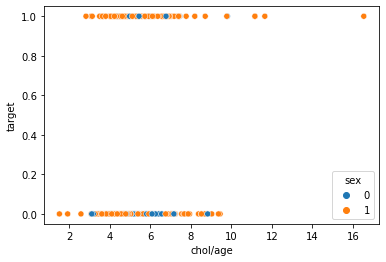

In [150]:
sns.scatterplot(data=data, x='chol/age', y='target', hue = 'sex')

[None]

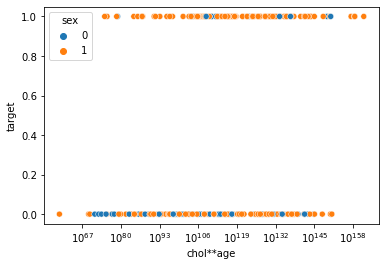

In [156]:
f = sns.scatterplot(data=data, x='chol**age', y='target', hue = 'sex')
f.set(xscale="log")

In [91]:
# # UNUSED

# # KMeans Clustering - 1
# # Age vs Cholesterol



# from sklearn.cluster import KMeans

# points_for_cluster = data[['age', 'chol']].values



# #Define the KMeans Model
# model = KMeans(n_clusters=4)

# #Cluster the Points using fit function
# cluster = model.fit(points_for_cluster)

# #Assign the Labels
# labels = model.predict(points_for_cluster)

# print(points_for_cluster.shape)


(294, 2)


In [92]:
# UNUSED

# # KMeans Clustering - 2
# # Separate Labels

# def separate_labels(labels, points):
#     data_0 = []
#     data_1 = []
#     data_2 = []
#     data_3 = []

#     ### BEGIN SOLUTION
#     for i in range(labels.shape[0]):
#         if labels[i] == 0:
#             data_0.append(points[i])
#         elif labels[i] == 1:
#             data_1.append(points[i])
#         elif labels[i] == 2:
#             data_2.append(points[i])
#         else:
#             data_3.append(points[i])

#     data_0 = np.array(data_0)
#     data_1 = np.array(data_1)
#     data_2 = np.array(data_2)
#     data_3 = np.array(data_3)
    
#     ### END SOLUTION
#     return data_0,data_1,data_2, data_3

# print(data_0.shape)
# print(data_1.shape)
# print(data_2.shape)
# print(data_3.shape)

(139, 2)
(36, 2)
(113, 2)
(6, 2)


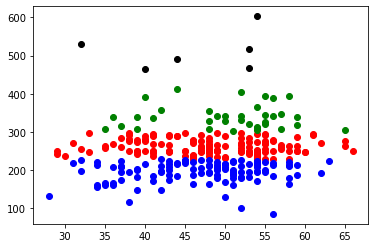

In [100]:
# UNUSED

# data_0, data_1, data_2, data_3 = separate_labels(labels, points_for_cluster)

# plt.scatter(data_0[:,0],data_0[:,1], c = "red", label="0")
# plt.scatter(data_1[:,0],data_1[:,1], c = "green", label="1")
# plt.scatter(data_2[:,0],data_2[:,1], c = "blue", label="2")
# plt.scatter(data_3[:,0],data_3[:,1], c = "black", label="3")


Text(0, 0.5, 'Cholesterol')

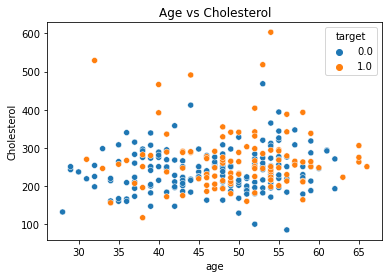

In [133]:
# UNUSED

# import seaborn as sns

# label = data.columns[-1]

# sns.scatterplot(data=data, x='age', y='chol', hue='target')
# plt.title('Age vs Cholesterol')
# plt.ylabel('Cholesterol')


17.62656787597232
64.94793916831776
23.58974931724648


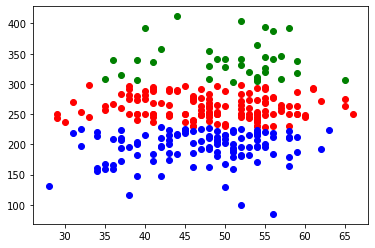

In [97]:
#For Sense Check, seeing the values for Standard Deviation for proposed enhanced data
print(data['trestbps'].std())
print(data['chol'].std())
print(data['thalach'].std())




In [76]:
# Data Enhancement
# Data to Enhance : 
#   1. trestbps : Resting Blood Presure
#   2. chol     : Cholesterol
#   3. thalach  : Maximum Heart Rate Achieved

#Case 1: Data Enhancement without Generated Features

def data_enhancement_1(data):
    
    #Copy the initial dataframe to a dummy dataframe
    generated_data = data.copy()

    #Calculate the std for each parameter
    trestbps_std = generated_data['trestbps'].std()
    chol_std = generated_data['chol'].std()
    thalach_std = generated_data['thalach'].std()

    for i in range(data.shape[0]):
        if np.random.randint(2) == 1:
            generated_data['trestbps'].values[i] += trestbps_std
        else:
            generated_data['trestbps'].values[i] -= trestbps_std

        if np.random.randint(2) == 1:
            generated_data['chol'].values[i] += chol_std
        else:
            generated_data['chol'].values[i] -= chol_std

        if np.random.randint(2) == 1:
            generated_data['thalach'].values[i] += thalach_std
        else:
            generated_data['thalach'].values[i] -= thalach_std
    
    return generated_data


    


In [77]:
# Generating Enhanced Data

data.head()
gen_data = data_enhancement_1(data)

gen_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,147.626568,67.052061,0,2,161.410251,0,0.0,0
1,29,1,2,137.626568,178.052061,0,0,183.589749,0,0.0,0
2,29,1,2,157.626568,315.796648,0,0,146.410251,0,0.0,0
3,30,0,1,152.373432,172.052061,0,1,146.410251,0,0.0,0
4,31,0,2,117.626568,154.052061,0,1,173.589749,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,177.626568,395.947939,0,0,117.589749,1,2.5,1
290,54,0,3,112.373432,229.052061,0,1,123.589749,1,0.0,1
291,56,1,4,137.373432,406.947939,1,0,126.410251,1,3.0,1
292,58,0,2,162.373432,328.052061,0,0,133.589749,1,1.0,1


In [78]:
# Train Test Split & Concatenation of Train sample & Enhanced Sample

# 1. Train Test Split
from sklearn.model_selection import train_test_split


#       Variable Determination
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

#       Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 0
                                                    )

print(f'x_train shape before concat: {x_train.shape[0]}')
print(f'y_train shape before concat: {y_train.shape[0]}')

# 2. Concatenation
extra_sample = gen_data.sample(math.floor(gen_data.shape[0] * 30 / 100))
x_train_enhanced = pd.concat([x_train, extra_sample.iloc[:,:-1]])
y_train_enhanced = pd.concat([y_train, extra_sample.iloc[:,-1]])

print(f'x_train shape after concat: {x_train_enhanced.shape[0]}')
print(f'y_train shape after concat: {y_train_enhanced.shape[0]}')




x_train shape before concat: 235
y_train shape before concat: 235
x_train shape after concat: 323
y_train shape after concat: 323
